# Дипломная работа

### Описание данных

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department  отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

**Задание 1.** Загрузите файл HR.csv в pandas dataframe.

In [229]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
# 1. Преобразую файл в датафрейм
HR = pd.read_csv('HR.csv', encoding='utf8')
print(HR.head())
print(HR.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

**Задание 2.** Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [95]:
# Среднее, минимальное и максимальное значения, а также среднее отклонение для всех количественных данных
# получаю с помощью describe
HR_quantitatives = HR.iloc[:, :5]

HR_quantitatives.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [96]:
# Медианное значение для всех количественных данных
HR_quantitatives.median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [97]:
# Мода для всех данных
HR.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3.** Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [98]:
HR_quantitatives.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<AxesSubplot:>

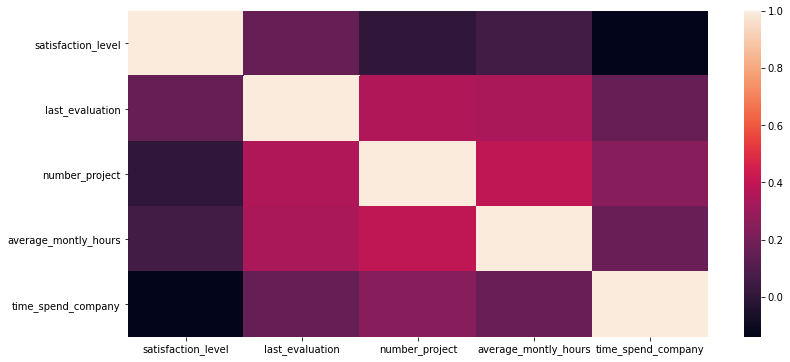

In [99]:
sns.heatmap(HR_quantitatives.corr(method='spearman'))

Лучше всего коррелируют среднее количество часов на рабочем месте в месяц и количество проектов, выполненных за время работы.

Самая низкая корреляция между временем, проведенным в компании, и уровнем удовлетворенности.

**Задание 4.** Рассчитайте сколько сотрудников работает в каждом департаменте.

In [100]:
HR_for_4 = HR[['satisfaction_level', 'department']].groupby(HR.department).count().sort_values(by='satisfaction_level', ascending=False)

HR_for_4

,satisfaction_level,department
department,,
sales,4140,4140
technical,2720,2720
support,2229,2229
IT,1227,1227
product_mng,902,902
marketing,858,858
RandD,787,787
accounting,767,767
hr,739,739


**Задание 5.** Покажите распределение сотрудников по зарплатам.

In [101]:
HR_for_5 = HR[['satisfaction_level', 'salary']].groupby(HR.salary).count().sort_values(by='satisfaction_level', ascending=False)
HR_for_5

,satisfaction_level,salary
salary,,
low,7316,7316
medium,6446,6446
high,1237,1237


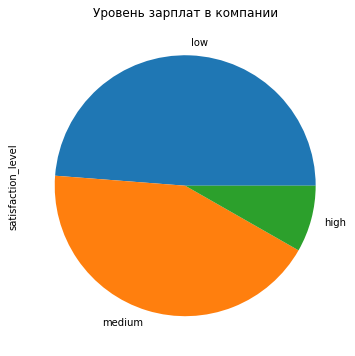

In [102]:
HR_for_5['satisfaction_level'].plot(kind='pie', title='Уровень зарплат в компании');

**Задание 6.** Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [103]:
HR_for_6 = HR[['satisfaction_level', 'department', 'salary']].groupby([HR.department, HR.salary]).count()
HR_for_6

satisfaction_level  department  salary
department  salary                                        
IT          high                    83          83      83
            low                    609         609     609
            medium                 535         535     535
RandD       high                    51          51      51
            low                    364         364     364
            medium                 372         372     372
accounting  high                    74          74      74
            low                    358         358     358
            medium                 335         335     335
hr          high                    45          45      45
            low                    335         335     335
            medium                 359         359     359
management  high                   225         225     225
            low                    180         180     180
            medium                 225         225     225
marketing   high                    80          80      80
            low                    402         402     402
            medium                 376         376     376
product_mng high                    68          68      68
            low                    451         451     451
            medium                 383         383     383
sales       high                   269         269     269
            low                   2099        2099    2099
            medium                1772        1772    1772
support     high                   141         141     141
            low                   1146        1146    1146
            medium                 942         942     942
technical   high                   201         201     201
            low                   1372        1372    1372
            medium                1147        1147    1147

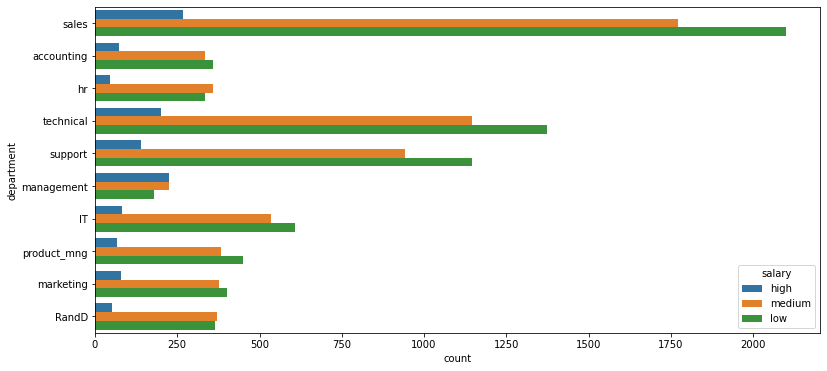

In [238]:
sns.countplot(y='department', hue='salary', hue_order=['high', 'medium', 'low'], data=HR);

**Задание 7.** Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

*Нулевая гипотеза:* время, которое сотрудники проводят на работе (average_monthly_hours) не зависит от их оклада(low/high salary).

*Альтернативная гипотеза:* время, которое сотрудники проводят на работе, зависит от их зарплаты.

Уровень значимости alpha принимаю равным 5%.

In [134]:
#Проверяю наличие статистических различий между выборками с помощью t-теста Уэлча и теста по критерию Манна-Уитни.
# Также проверю разницу дисперсий между тремя группами с помощью теста по критерию Фишера.
HR_low_salary = HR[HR.salary=='low']
HR_high_salary = HR[HR.salary=='high']
HR_medium_salary = HR[HR.salary=='medium']

print(stats.ttest_ind(HR_low_salary['average_montly_hours'], HR_high_salary['average_montly_hours'], equal_var=False))
print(stats.mannwhitneyu(HR_low_salary['average_montly_hours'], HR_high_salary['average_montly_hours']))
print(stats.f_oneway(HR_low_salary['average_montly_hours'], HR_high_salary['average_montly_hours'], HR_medium_salary['average_montly_hours']))

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)
F_onewayResult(statistic=0.4583624407867663, pvalue=0.6323271153144614)


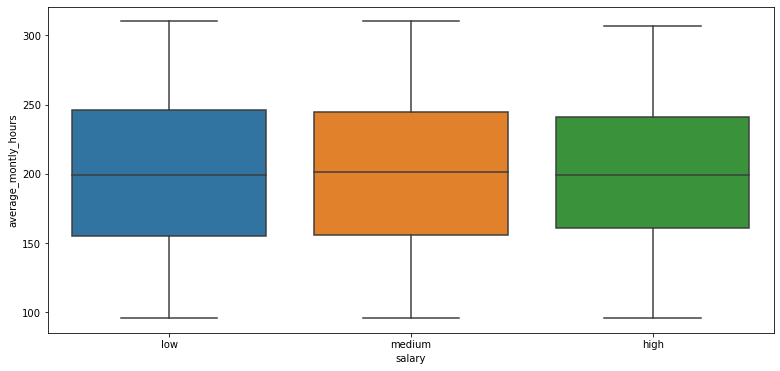

In [136]:
sns.boxplot(x='salary', y='average_montly_hours', data=HR);

In [140]:
#Посчитаю еще среднее и медиану для всех трех групп, хотя уже очевидно, что гипотеза не подтвердилась.
print(f'Среднее время на работе для сотрудников с низкой зарплатой = {HR_low_salary["average_montly_hours"].mean():.2f}')
print(f'Среднее время на работе для сотрудников со средней зарплатой = {HR_medium_salary["average_montly_hours"].mean():.2f}')
print(f'Среднее время на работе для сотрудников с высокой зарплатой = {HR_high_salary["average_montly_hours"].mean():.2f}')
print(f'Медиана времени на работе для сотрудников с низкой зарплатой = {HR_low_salary["average_montly_hours"].median():.2f}')
print(f'Медиана времени на работе для сотрудников со средней зарплатой = {HR_medium_salary["average_montly_hours"].median():.2f}')
print(f'Медиана времени на работе для сотрудников с высокой зарплатой = {HR_high_salary["average_montly_hours"].median():.2f}')

Среднее время на работе для сотрудников с низкой зарплатой = 201.00
Среднее время на работе для сотрудников со средней зарплатой = 201.34
Среднее время на работе для сотрудников с высокой зарплатой = 199.87
Медиана времени на работе для сотрудников с низкой зарплатой = 199.00
Медиана времени на работе для сотрудников со средней зарплатой = 201.00
Медиана времени на работе для сотрудников с высокой зарплатой = 199.00


Таким образом, статистически значимых различий по параметру average_montly_hours между сотрудниками с высокой и низкой зарплатой не найдено: ни в одном проведенном тесте p-value не превосходит уровень значимости.

*Вывод:* время, которое сотрудники проводят на работе, вероятно, не зависит от уровня их зарплаты.

**Задание 8.** Рассчитайте следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [141]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [178]:
HR_stayed = HR.where(HR.left==0).dropna(how='all')
HR_left = HR.where(HR.left==1).dropna(how='all')

In [241]:
# Доля сотрудников с повышением
stayed = HR_stayed.left.count()
left = HR_left.left.count()

stayed_with_prom = HR.left[(HR.left==0) & (HR.promotion_last_5years==1)].count()

left_with_prom = HR.left[(HR.left==1) & (HR.promotion_last_5years==1)].count()

In [240]:
print(f'Доля повышенных за последние пять лет сотрудников среди неуволившихся составляет {stayed_with_prom / stayed:.5f}')
print(f'Доля повышенных за последние пять лет сотрудников среди уволившихся составляет {left_with_prom / left:.5f}')

Доля повышенных за последние пять лет сотрудников среди неуволившихся составляет 0.02625
Доля повышенных за последние пять лет сотрудников среди уволившихся составляет 0.00532


In [190]:
#Средняя степень удовлетворенности сотрудников
print(f'Средняя степень удовлетворенности работающих сотрудников составляет {HR_stayed["satisfaction_level"].mean():.3f}')
print(f'Средняя степень удовлетворенности уволенных сотрудников составляет {HR_left["satisfaction_level"].mean():.3f}')

Средняя степень удовлетворенности работающих сотрудников составляет 0.667
Средняя степень удовлетворенности уволенных сотрудников составляет 0.440


In [196]:
#Среднее количество проектов.
print(f'Среднее количество проектов у работающих сотрудников составляет {HR_stayed["number_project"].mean():.2f}')
print(f'Среднее количество проектов у уволенных сотрудников составляет {HR_left["number_project"].mean():.2f}')

Среднее количество проектов у работающих сотрудников составляет 3.79
Среднее количество проектов у уволенных сотрудников составляет 3.86


**Задание 9.**

Разделить данные на тестовую и обучающую выборки.

Построить модель LDA, предсказывающую, уволился ли сотрудник, на основе имеющихся факторов (кроме department и salary).

Оценить качество модели на тестовой выборке.

In [210]:
HR_data = HR.iloc[:, [0, 1, 2, 3, 4, 5, 7]]

HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [209]:
#Разделяю данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(HR_data, HR['left'], test_size=0.30, random_state=42)

In [212]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [223]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [224]:
accuracy_score(y_test, y_pred)

0.7557777777777778

In [232]:
confusion_matrix(y_test, y_pred, labels = [0, 1], sample_weight=None, normalize=None)

array([[3138,  290],
       [ 809,  263]], dtype=int64)

Таким образом, LDA-модель показала эффективность примерно 75% (результаты accuracy_score). Как демонстрирует матрица ошибок, в тестовой выборке из 4500 единиц 1099 предсказаны неверно (для 290 сотрудников, которые остались, было предсказано, что они уйдут, и для 809 сотрудников, которые ушли, было предсказано, что они останутся).